**Let's perform EDA on QSAR Data**

In [1]:
## Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Other imports 
from sklearn.model_selection import train_test_split

In [4]:
# Reading the data
qsar = pd.read_csv('qsar_fish_toxicity.csv', sep=';', header=None)
qsar.columns = ['CICO', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50(mol/L)']

## Looking into the data
df = qsar.copy()
df.head()

,CICO,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50(mol/L)
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


About DataSet


Data: Ballabio,Davide, Cassotti,Matteo, Consonni,Viviana, and Todeschini,Roberto. (2019). QSAR fish toxicity. UCI Machine Learning Repository. https://doi.org/10.24432/C5JG7B.  

This dataset was used to develop quantitative regression QSAR models to predict acute aquatic toxicity towards the fish Pimephales promelas (fathead minnow) on a set of 908 chemicals. LC50 data, which is the concentration that causes death in 50% of test fish over a test duration of 96 hours, was used as model response. The model comprised 6 molecular descriptors: MLOGP (molecular properties), CIC0 (information indices), GATS1i (2D autocorrelations), NdssC (atom-type counts), NdsCH ((atom-type counts), SM1_Dz(Z) (2D matrix-based descriptors).  

Details can be found in the quoted reference: M. Cassotti, D. Ballabio, R. Todeschini, V. Consonni. A similarity-based QSAR model for predicting acute toxicity towards the fathead minnow (Pimephales promelas), SAR and QSAR in Environmental Research (2015), 26, 217-243; doi: 10.1080/1062936X.2015.1018938

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CICO         908 non-null    float64
 1   SM1_Dz(Z)    908 non-null    float64
 2   GATS1i       908 non-null    float64
 3   NdsCH        908 non-null    int64  
 4   NdssC        908 non-null    int64  
 5   MLOGP        908 non-null    float64
 6   LC50(mol/L)  908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [6]:
df.shape

(908, 7)

In [7]:
## checking the number of unique values in each of the  features
for feature in df.drop('LC50(mol/L)', axis=1).columns:
    print(f"The unique values in the  feature named {feature} are {df[feature].unique()}, (Total of {df[feature].nunique()}).\n")

The unique values in the  feature named CICO are [3.26  2.189 2.125 3.027 2.094 3.222 3.179 3.    2.62  2.834 2.405 2.728
 2.512 2.819 2.126 3.014 3.024 3.036 2.707 2.978 3.111 3.315 2.71  3.326
 3.332 3.896 3.155 2.479 1.075 3.645 3.079 2.726 3.532 4.216 3.605 2.918
 3.833 3.669 2.824 2.233 3.103 4.413 3.641 3.073 3.012 3.818 4.171 3.734
 2.216 2.086 3.08  1.636 2.219 1.594 1.818 1.5   1.512 2.56  1.359 0.667
 2.333 2.026 0.965 1.951 1.    3.219 3.74  3.57  5.926 3.802 2.802 2.242
 1.94  3.277 2.359 2.565 2.085 2.26  2.91  2.866 2.386 3.509 2.98  3.462
 2.755 2.024 2.609 2.878 1.961 2.665 1.251 2.377 2.366 2.462 1.778 3.609
 3.316 2.    3.441 2.429 3.143 2.709 2.701 3.252 2.111 3.361 3.52  3.181
 3.369 2.507 2.67  2.704 3.566 2.594 3.485 3.596 3.199 2.57  4.005 3.201
 3.98  4.114 4.237 4.63  2.456 2.536 3.461 2.641 3.38  2.544 1.279 2.572
 3.728 3.358 2.96  4.81  3.311 3.023 2.585 1.925 2.454 2.508 2.222 3.389
 2.031 1.965 3.351 3.452 4.288 1.962 3.041 2.777 2.218 1.822 3.459 2.442
 1

It seems that the columns namely NdsCH and NdssC are categorical in nature but are already encoded.

In [8]:
## Let's check the distribution of categories in the features NdsCH and NdssC
for feature in ['NdsCH', 'NdssC']:
    print(f"{df[feature].value_counts()}\n")

0    760
1    107
2     29
4      7
3      5
Name: NdsCH, dtype: int64

0    622
1    176
2     81
3     18
4      8
6      2
5      1
Name: NdssC, dtype: int64



In [10]:

## Splitting the data into independent features and dependent features
X, y = df.drop('LC50(mol/L)', axis=1), df['LC50(mol/L)']

## Splitting the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=34, stratify=X[['NdsCH']])

In [11]:
## checking the number of rows and columns in the X_train
print(f"The number of rows in the data are {X_train.shape[0]}.")
print(f"The number of columns in the data are {X_train.shape[1]}.")

## checking the number of rows and columns in the X_test
print(f"The number of rows in the data are {X_test.shape[0]}.")
print(f"The number of columns in the data are {X_test.shape[1]}.")

The number of rows in the data are 862.
The number of columns in the data are 6.
The number of rows in the data are 46.
The number of columns in the data are 6.


In [12]:
## Let's check the distribution of categories in the features NdsCH and NdssC
for feature in ['NdsCH', 'NdssC']:
    print(f"{X_train[feature].value_counts()}\n")

0    721
1    102
2     27
4      7
3      5
Name: NdsCH, dtype: int64

0    595
1    165
2     75
3     17
4      8
6      2
Name: NdssC, dtype: int64



In [13]:
# Let's check the distribution of categories in the features NdsCH and NdssC
for feature in ['NdsCH', 'NdssC']:
    print(f"{X_test[feature].value_counts()}\n")

0    39
1     5
2     2
Name: NdsCH, dtype: int64

0    27
1    11
2     6
3     1
5     1
Name: NdssC, dtype: int64



In [14]:
##finding out if any feature has zero variance (numerical feature)
print("Numerical features having zero variance:\n")
for feature in X_train.columns:
    if X_train[feature].var() == 0:
        print(feature)

Numerical features having zero variance:



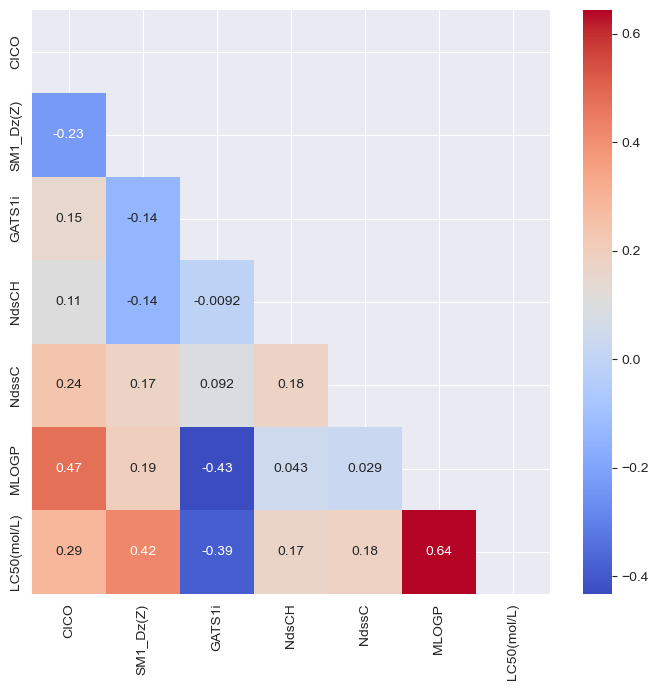

In [15]:
## checking the correlation between the  independent features and depedent feature LC50(mol/L)
sns.set_style('darkgrid')
plt.figure(figsize=(7,7))
data = pd.concat([X_train, pd.DataFrame(y_train, columns=['LC50(mol/L)'])], axis=1)
corr = data[data.columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm',mask=mask)
plt.tight_layout()

Here we can make following conclusions:
1. All the independent features except GATS1i are positively correlated with the dependent feature.
2. None of the independent features are highly correlated with each other.

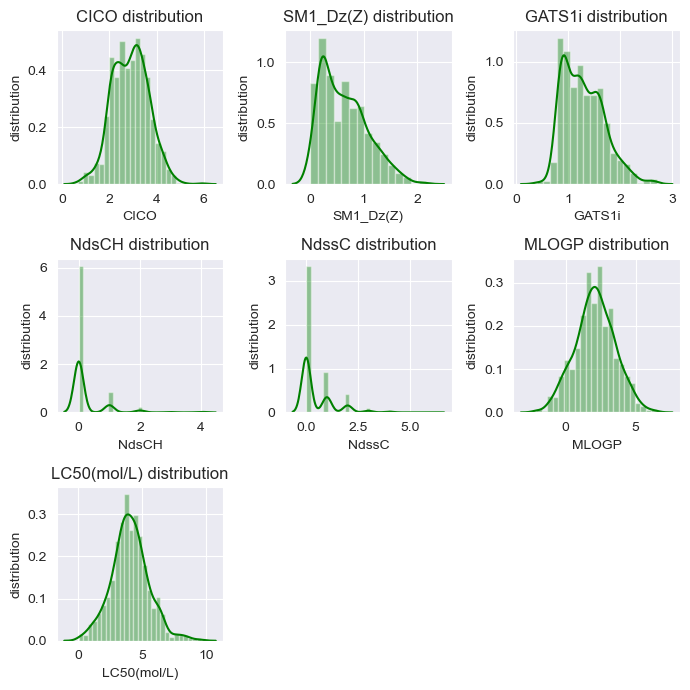

In [16]:
## checking the distribution of features

sns.set_style('darkgrid')
plt.figure(figsize=(7,7))
data = pd.concat([X_train, pd.DataFrame(y_train, columns=['LC50(mol/L)'])], axis=1)
for index, feature in enumerate(data.columns):
    plt.subplot(3,3,index+1)
    sns.distplot(data[feature],kde=True, color='g')
    plt.xlabel(feature)
    plt.ylabel('distribution')
    plt.title(f"{feature} distribution")

plt.tight_layout()

Most of the features look in normal distribution. NdsCH and NdssC are not in normal distibution but that's okay since they are categorical features encoded into numbers.

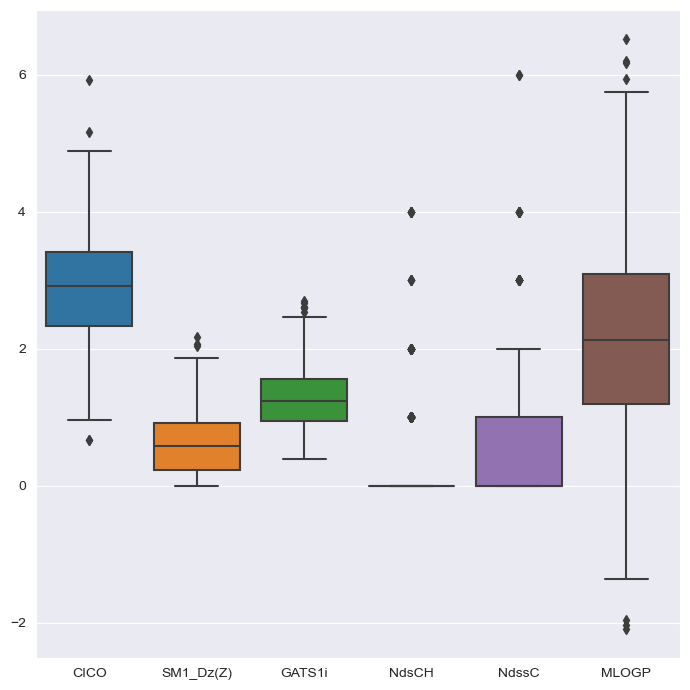

In [18]:
# finding out the outliers in the features using box plot
plt.figure(figsize=(7,7))
sns.boxplot(data=X_train[X_train.columns], orient='v')
plt.tight_layout()

All the columns have some amount of outliers. Since we have very small amount of training data, we will make use of machine learning algorithm that does not get affected by outliers' presence.

In [19]:
# checking if the features have any missing values
miss_Val = pd.DataFrame()
miss_Val['Feature'] = X_train.columns
miss_Val['Missing_Value_Count'] = X_train[X_train.columns].isnull().sum().to_numpy()
miss_Val['Missing_Value_Percentage'] = miss_Val['Missing_Value_Count'].apply(lambda x: np.round(x/X_train.shape[0],2)*100)
miss_Val

,Feature,Missing_Value_Count,Missing_Value_Percentage
0,CICO,0,0.0
1,SM1_Dz(Z),0,0.0
2,GATS1i,0,0.0
3,NdsCH,0,0.0
4,NdssC,0,0.0
5,MLOGP,0,0.0


The Data has no Missing values